##Task-03
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("//content/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Statistics information of data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Data Cleaning

In [ ]:
# Checking the null values in data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Checking the duplicate values in data
df.duplicated().sum()

0

In [ ]:
# Check the shape (columns and row) of data
df.shape

(11162, 17)

## Data Visualization

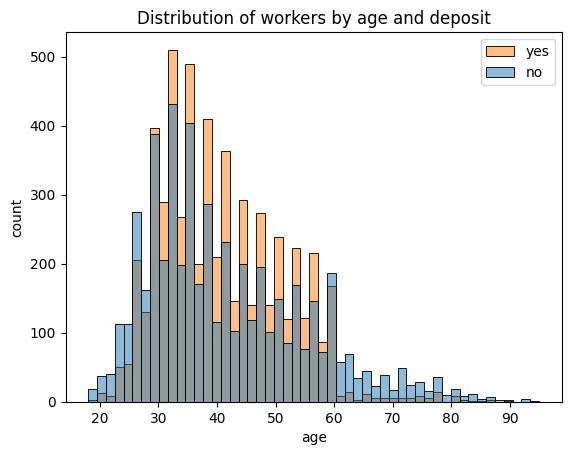

In [ ]:
# Histogram by age and deposit column
sns.histplot(x="age", hue="deposit", data=df)
plt.title("Distribution of workers by age and deposit")
plt.xlabel("age")
plt.ylabel("count")
plt.legend(labels=['yes','no'])
plt.show()

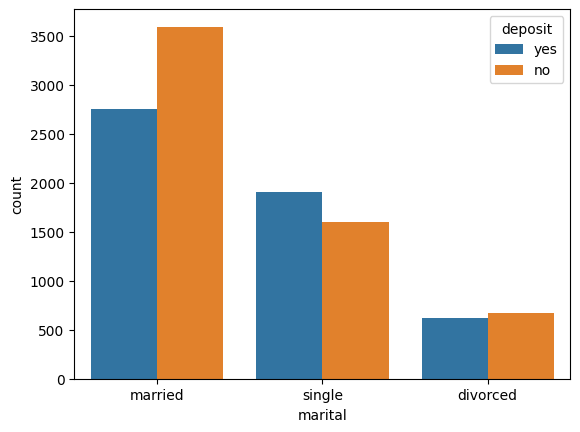

In [ ]:
# countplot of employee deposit by marital
sns.countplot(x="marital",hue="deposit", data=df)
plt.xlabel("marital")
plt.ylabel("count")
plt.show()


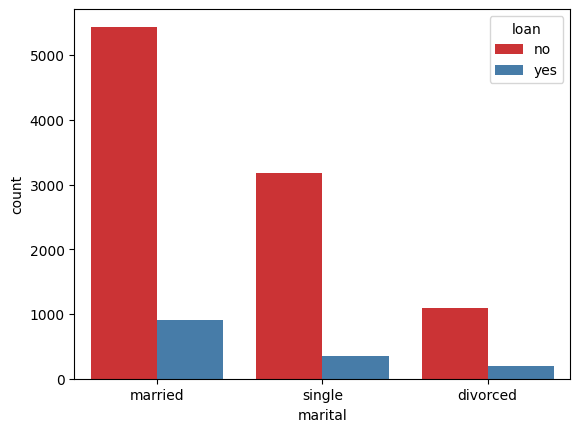

In [ ]:
# countplot of loan deposit by marital
sns.countplot(x="marital",data=df,palette="Set1",hue="loan")
plt.show()

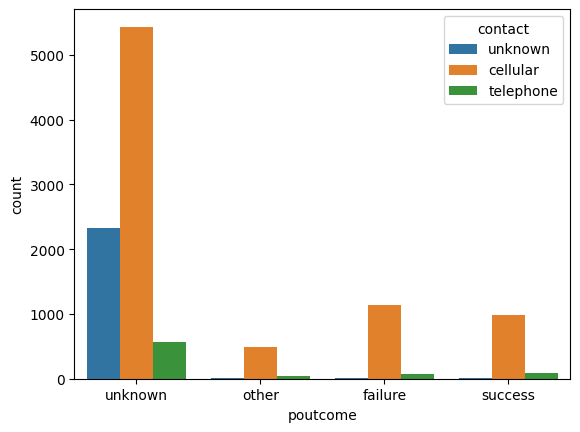

In [ ]:
# countplot of putcome by contact
sns.countplot(x="poutcome",data=df,hue="contact")
plt.show()


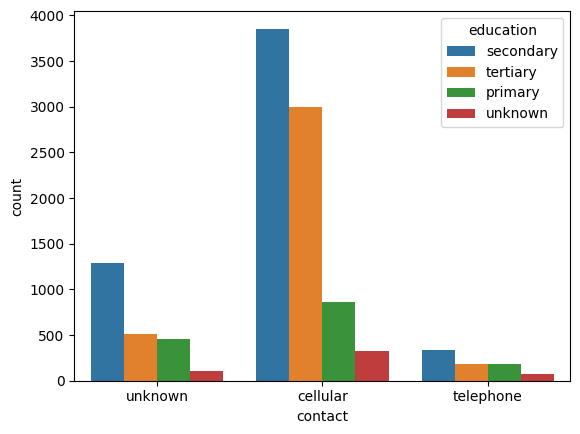

In [ ]:
# countplot of contact by education
sns.countplot(x="contact",data=df,hue="education")
plt.show()

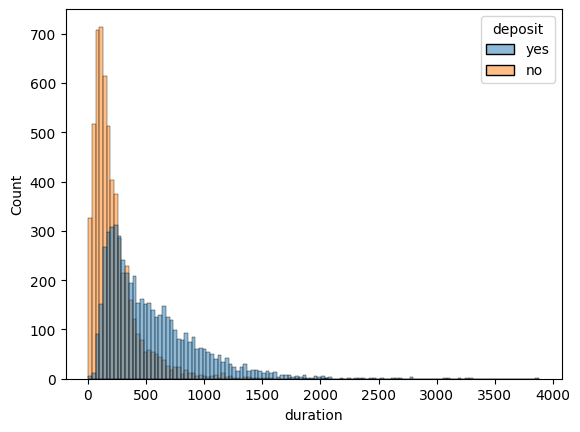

In [ ]:
# Histogram of duration by deposit
sns.histplot(x="duration", hue="deposit", data=df)
plt.show()

<Axes: ylabel='count'>

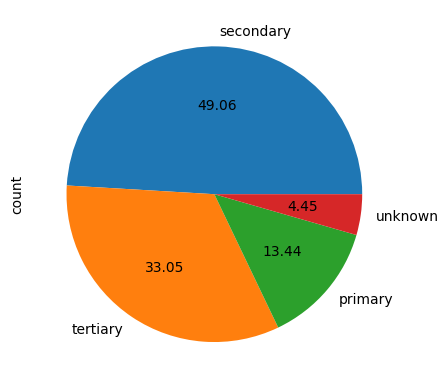

In [ ]:
# Pie chart of education by its percentange
df["education"].value_counts().plot(kind="pie",autopct='%.2f')

<Axes: xlabel='deposit'>

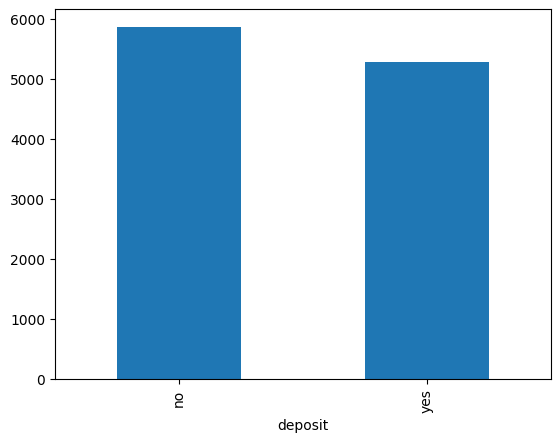

In [ ]:
# bar chart of deposit
df["deposit"].value_counts().plot(kind="bar")

<Axes: xlabel='deposit', ylabel='age'>

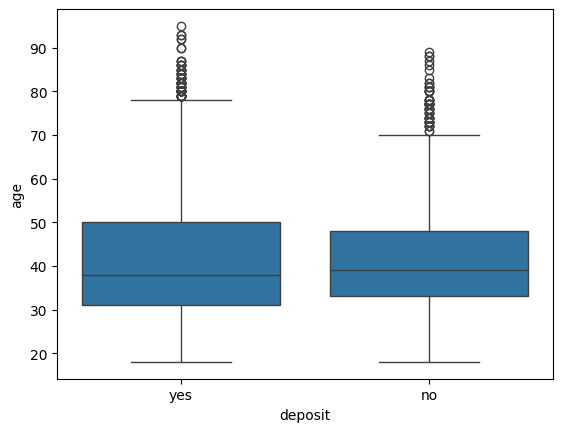

In [ ]:
# Boxplot of deposit and age columns
sns.boxplot(x="deposit", y="age", data=df)

<Axes: xlabel='deposit', ylabel='contact'>

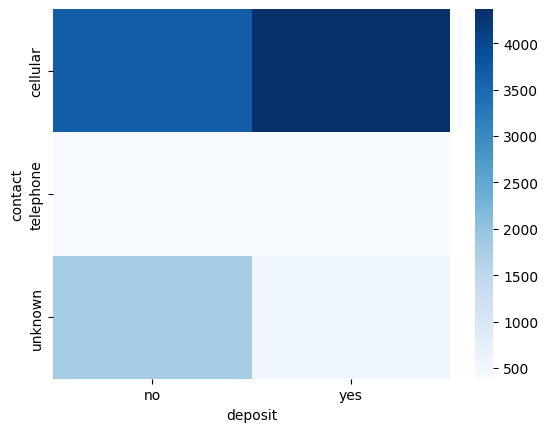

In [ ]:
# Hheatmap of deposit by contact
sns.heatmap(pd.crosstab(df["contact"], df["deposit"]), cmap="Blues")

## Data Encoding

In [ ]:
# OneHot Encoing on marital column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df[["marital"]])

OneHotEncoder()

In [ ]:
df['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [ ]:
res = encoder.transform(df[['marital']]).toarray()
df[['married','single','divorced']] = res

In [ ]:
# Drop the marital column
df.drop('marital', axis=1, inplace=True)

In [ ]:
# Method to select categorical column
ordinal_columns = df.select_dtypes("O").columns

In [ ]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
for col in ordinal_columns:
  df[col]= encoder.fit_transform(df[col])

In [ ]:
df.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single,divorced
0,59,0,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,0.0,1.0,0.0
1,56,0,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,0.0,1.0,0.0
2,41,9,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,0.0,1.0,0.0
3,55,7,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,0.0,1.0,0.0
4,54,0,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,0.0,1.0,0.0


## Data Balancing

In [ ]:
x= df.drop("deposit", axis=1)
y= df.deposit

<Axes: xlabel='deposit'>

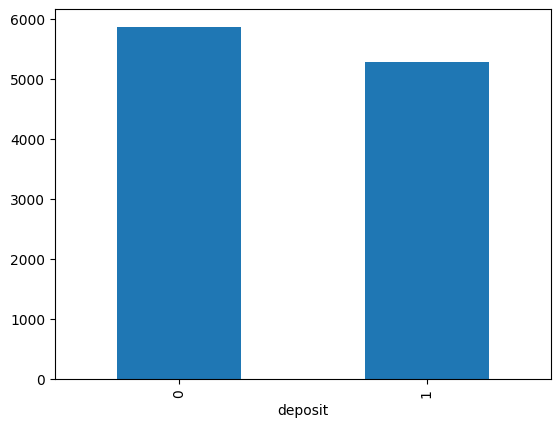

In [ ]:
df.deposit.value_counts().plot(kind="bar")

In [ ]:
# Apply SMOTE technique to balance the data
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x_new, y_new = sampler.fit_resample(x,y)

<Axes: xlabel='deposit'>

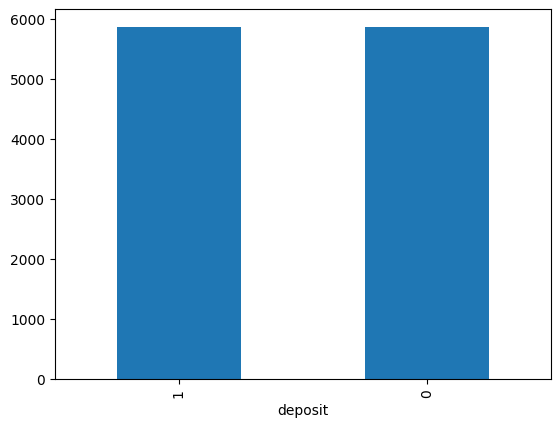

In [ ]:
y_new.value_counts().plot(kind="bar")

In [ ]:
col = ['duration','balance','age']

In [ ]:
x[col]

,duration,balance,age
0,1042,2343,59
1,1467,45,56
2,1389,1270,41
3,579,2476,55
4,673,184,54
...,...,...,...
11157,257,1,33
11158,83,733,39
11159,156,29,32
11160,9,0,43


## Data Scaling

In [ ]:
# Apply minmaxscalar to scale the data
from sklearn.preprocessing import MinMaxScaler
model= MinMaxScaler(feature_range=(1,5))
model.fit(x[col])
x[col] = model.transform(x[col])
df[col] = x[col]

In [ ]:
df.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single,divorced
0,3.129870,0,1,0,1.417485,1,0,2,5,8,2.072441,1,-1,0,3,1,0.0,1.0,0.0
1,2.974026,0,1,0,1.313091,0,0,2,5,8,2.510699,1,-1,0,3,1,0.0,1.0,0.0
2,2.194805,9,1,0,1.368741,1,0,2,5,8,2.430266,1,-1,0,3,1,0.0,1.0,0.0
3,2.922078,7,1,0,1.423527,1,0,2,5,8,1.594999,1,-1,0,3,1,0.0,1.0,0.0
4,2.870130,0,2,0,1.319406,0,0,2,5,8,1.691931,2,-1,0,3,1,0.0,1.0,0.0


## Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2)

## Modeling

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# import the decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    name = type(model).__name__
    print(name)
    print(train_score)
    print(test_score)
    print(acc)
    print(pre)
    print(rec)
    print(f1)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print("++++++++++++++++++++++++++++++++++++++++++++++++")

DecisionTreeRegressor
1.0
0.1266845306785067
0.7817021276595745
0.7764505119453925
0.7838070628768303
0.7801114444920704
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1189
           1       0.78      0.78      0.78      1161

    accuracy                           0.78      2350
   macro avg       0.78      0.78      0.78      2350
weighted avg       0.78      0.78      0.78      2350

[[927 262]
 [251 910]]
++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
cn = confusion_matrix(y_test, y_pred)

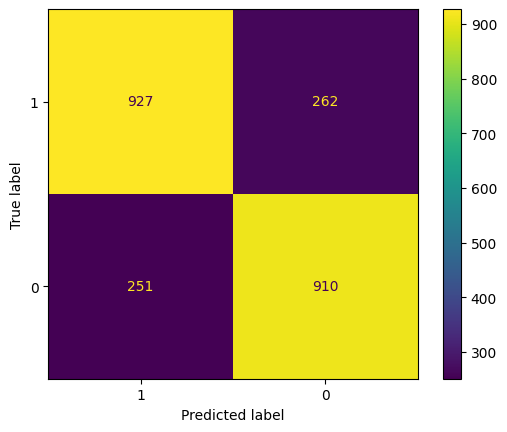

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cn, display_labels=y_test.unique())
disp.plot()